# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv(r"C:\Users\photo\Desktop\Ironhack\labs\week-5\lab-descriptive-stats\your-code\Temp_States.csv", encoding='latin1')

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.dtypes

# City and State columns contain textual data, while the 'Temperature' column contains numerical data (floats) representing temperature values.

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
ny_rows = temp[temp['State'] == 'New York']
ny_rows

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
avg_ny = ny_rows['Temperature'].mean()
avg_ny

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
above_15 = temp[temp['Temperature'] > 15]
above_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
cit_above_15 = above_15['City']
cit_above_15

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
condition = (temp['Temperature'] > 15) & (temp['Temperature'] < 20)
cities_between = temp[condition]['City']
cities_between

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
state_temperature = temp.groupby('State')['Temperature'].agg(['mean', 'std'])
state_temperature= state_temperature.rename(columns={'mean': 'Mean Temperature', 'std': 'Standard Deviation'})
state_temperature= state_temperature.reset_index()

state_temperature

,State,Mean Temperature,Standard Deviation
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
employee = pd.read_csv(r"C:\Users\photo\Desktop\Ironhack\labs\week-5\lab-descriptive-stats\your-code\employee.csv", encoding='latin1')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
employee.dtypes
# name, department, education, gender and title columns contain textual or categorical data, while the yeras and salary columns contain numerical data (integers)

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

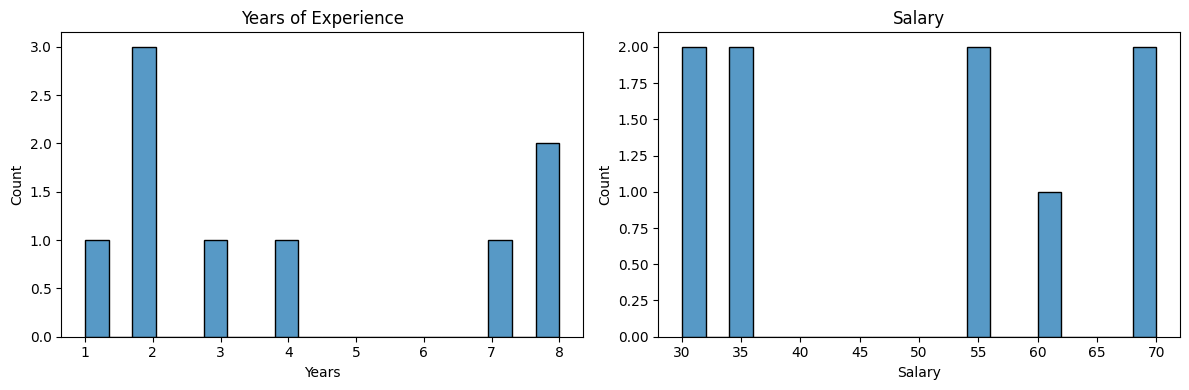

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.histplot(data=employee, x='Years', bins=20, ax=axes[0])
axes[0].set_title('Years of Experience')

sns.histplot(data=employee, x='Salary', bins=20, ax=axes[1])
axes[1].set_title('Salary')

plt.tight_layout()
plt.show()

In [14]:
## the Years of Experience histogram (left) shows the distribution of the number of years of experience among employees. The x-axis represents the range of years, and the y-axis shows how many employees have a specific range of experience.

## the Salary histogram (right) displays the distribution of employee salaries. The x-axis represents salary ranges, and the y-axis represents the frequency or count of employees in each salary range.

#### What's the average salary in this company?

In [15]:
avg_salary = employee['Salary'].mean()
avg_salary

48.888888888888886

#### What's the highest salary?

In [16]:
highest_salary = employee['Salary'].max()
highest_salary

70

#### What's the lowest salary?

In [17]:
lowest_salary = employee['Salary'].min()
lowest_salary

30

#### Who are the employees with the lowest salary?

In [18]:
empl_ls = employee.nsmallest(5, 'Salary')
empl_ls

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
0,Jose,IT,Bachelor,M,analyst,1,35
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Could you give all the information about an employee called David?

In [19]:
david = employee[employee['Name'] == 'David']
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [20]:
david[['Name', 'Salary']]

,Name,Salary
2,David,30


#### Print all the rows where job title is associate

In [21]:
associate_employees = employee[employee['Title'] == 'associate']
associate_employees

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [22]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [23]:
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [24]:
as_sal_employees = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
as_sal_employees

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [25]:
avg_salaries = employee.groupby('Years')['Salary'].agg('mean')
avg_salaries = avg_salaries.reset_index()
avg_salaries = avg_salaries.rename(columns={'Salary': 'Average Salary'})
avg_salaries

,Years,Average Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [26]:
avg_title = employee.groupby('Title')['Salary'].agg('mean')
avg_title = avg_title.reset_index()
avg_title = avg_title.rename(columns={'Salary': 'Average Salary'})
avg_title

,Title,Average Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

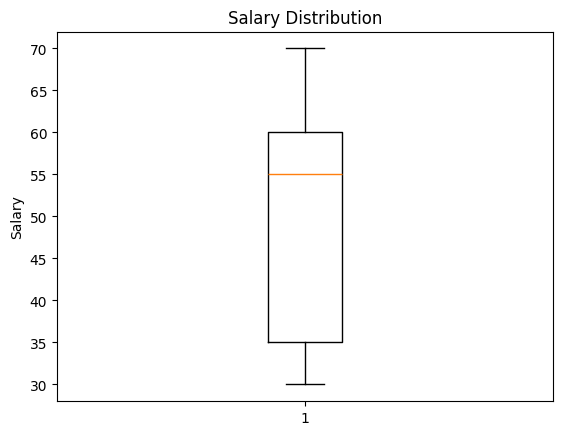

In [27]:
plt.boxplot(employee['Salary'])
plt.title('Salary Distribution')
plt.ylabel('Salary')
plt.show()

first_quartile = employee['Salary'].quantile(0.25)
third_quartile = employee['Salary'].quantile(0.75)

In [28]:
first_quartile

35.0

In [29]:
third_quartile

60.0

#### Is the mean salary per gender different?

In [30]:
# it is different

avg_gender = employee.groupby('Gender')['Salary'].agg('mean')
avg_gender = avg_gender.reset_index()
avg_gender = avg_gender.rename(columns={'Salary': 'Average Salary'})
avg_gender

,Gender,Average Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [31]:
department_stats = employee.groupby('Department').agg({
    'Years': ['min', 'mean', 'max'],
    'Salary': ['min', 'mean', 'max']})

department_stats.columns = [f'{col[0]}_{col[1]}' for col in department_stats.columns]
department_stats

,Years_min,Years_mean,Years_max,Salary_min,Salary_mean,Salary_max
Department,,,,,,
HR,2,4.666667,8,30,45.00,70
IT,1,4.500000,8,30,48.75,70
Sales,2,2.500000,3,55,55.00,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
dep_salaries = employee.groupby('Department').agg(
    salary_range=('Salary', lambda x: x.max() - x.min()))
dep_salaries

,salary_range
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [33]:
zip_file_path = r"C:\Users\photo\Desktop\Ironhack\labs\week-5\lab-descriptive-stats\your-code\Orders.zip"

with zipfile.ZipFile(zip_file_path, 'r') as zipf:
    csv_file_name = zipf.namelist()[0]  
    zipf.extract(csv_file_name)
    
orders = pd.read_csv(csv_file_name, encoding='latin1')
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [34]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [35]:
# Columnns Unnamed, InvoiceNo, year, month, day, hour, Quantity and CustomerID are integers
# We hav two columns of floats: UnitPrice and amount_spent
# We have three columns of strings, StockCode, Description and Country

####  What is the average Purchase Price?

In [36]:
avg_pprice = orders['amount_spent'].mean()
avg_pprice

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [37]:
highest_pprice = orders['amount_spent'].max()
highest_pprice

168469.6

In [38]:
lowest_pprice = orders['amount_spent'].min()
lowest_pprice

0.0

#### Select all the customers we have in Spain

In [39]:
spain = orders[orders['Country'] == 'Spain']
spain[['CustomerID', 'Country']]

,CustomerID,Country
4250,12557,Spain
4251,12557,Spain
4252,12557,Spain
4253,12557,Spain
4254,12557,Spain
...,...,...
394733,17097,Spain
394734,17097,Spain
394735,17097,Spain
394736,17097,Spain


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [45]:
result=pd.DataFrame((orders.Country.value_counts()))
result.query("Country == 'Spain'")

,count
Country,
Spain,2485


#### Select all the customers who have bought more than 50 items ?

In [68]:
cust_it = orders.groupby('CustomerID').sum(['Quantity']).query("Quantity > 50")
cust_it

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,amount_spent
CustomerID,,,,,,,,,
12346,61619,541431,2011,1,2,10,74215,1.04,77183.60
12347,42441700,101296926,365971,1383,441,2219,2458,481.21,4310.00
12348,2807120,16869685,62324,257,111,472,2341,178.71,1797.24
12349,35444274,42165457,146803,803,73,657,631,605.10,1757.55
12350,1365627,9231629,34187,34,51,272,197,65.30,334.40
...,...,...,...,...,...,...,...,...,...
18278,3262446,5116428,18099,81,18,99,66,29.55,173.90
18281,1560699,3895248,14077,42,49,70,54,39.36,80.82
18282,4642134,6838540,24132,116,60,146,103,62.39,178.05


#### Select orders from Spain that are above 50 items

In [73]:
spain_or = orders[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)]
spain_or

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [79]:
free_or = orders.groupby('InvoiceNo').sum(['amount_spent']).query("amount_spent == 0")
free_or

,Unnamed: 0,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
InvoiceNo,,,,,,,,,
543599,86789,2011,2,4,13,16,0.0,17560,0.0
564651,1258986,8044,32,20,56,576,0.0,58584,0.0
568384,361825,2011,9,2,9,1,0.0,12748,0.0
578841,502122,2011,11,5,15,12540,0.0,13256,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [166]:
lunch_bag = orders[orders['Description'].str.contains('lunch bag', case=False)]
lunch_bag

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [167]:
lunch_bag11 = orders[(orders['Description'].str.contains('lunch bag', case=False)) & (orders['year'] == 2011)]
lunch_bag11

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

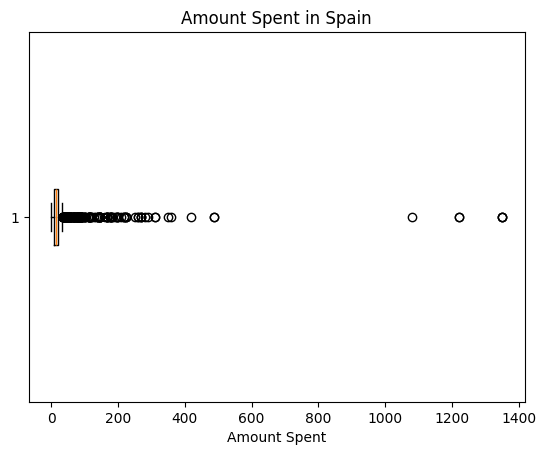

In [66]:
spain = orders[orders['Country'] == 'Spain']
amount_spent = spain['amount_spent']

plt.boxplot(amount_spent, vert=False)
plt.title('Amount Spent in Spain')
plt.xlabel('Amount Spent')
plt.show()

#### Select all orders made in the month of August

In [89]:
aug_or = orders[orders['month'] == 8]
aug_or

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [120]:
country_count = orders.query("month == 8")
country_count = country_count['Country'].value_counts()
country_count

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64

#### What's the  average amount of money spent by country

In [121]:
avg_country = orders.groupby('Country')['amount_spent'].agg('mean')
avg_country = avg_country.reset_index()
avg_country= avg_country.rename(columns={'Country': 'Average Amount'})
avg_country

,Average Amount,amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,27.340160
7,Cyprus,22.134169
8,Czech Republic,33.069600
9,Denmark,49.882474


#### What's the most expensive item?

In [125]:
exp_item = orders[orders['UnitPrice'] == orders['UnitPrice'].max()]
exp_item

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [99]:
avg_year = orders.groupby('year')['amount_spent'].agg('mean')
avg_year = avg_year.reset_index()
avg_year = avg_year.rename(columns={'Year': 'Average Amount'})
avg_year

,year,amount_spent
0,2010,21.892733
1,2011,22.430074
